# Logistic Regression Project 

**GOAL: Create a Classification Model that can predict whether or not a person has the presence of heart disease based on physical features of that person (age, sex, cholesterol, etc...)**


## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on the physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is an integer (0 for no presence, 1 for presence). In general, confirming 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholesterol in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise-induced angina
* old peak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by fluoroscopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
* target:0 for no presence of heart disease, 1 for the presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Visualization

<Axes: xlabel='target', ylabel='count'>

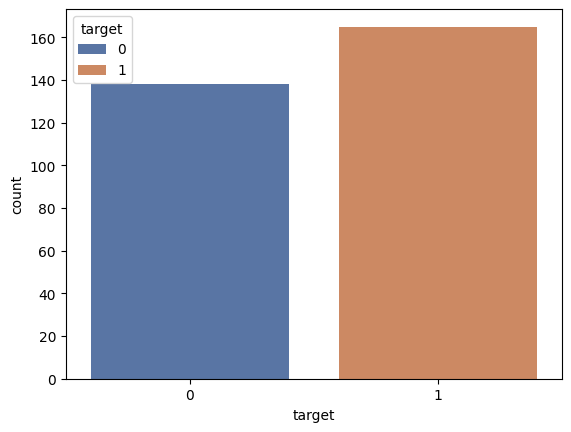

In [8]:
sns.countplot(x=df['target'], hue=df['target'], palette='deep')

**The relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


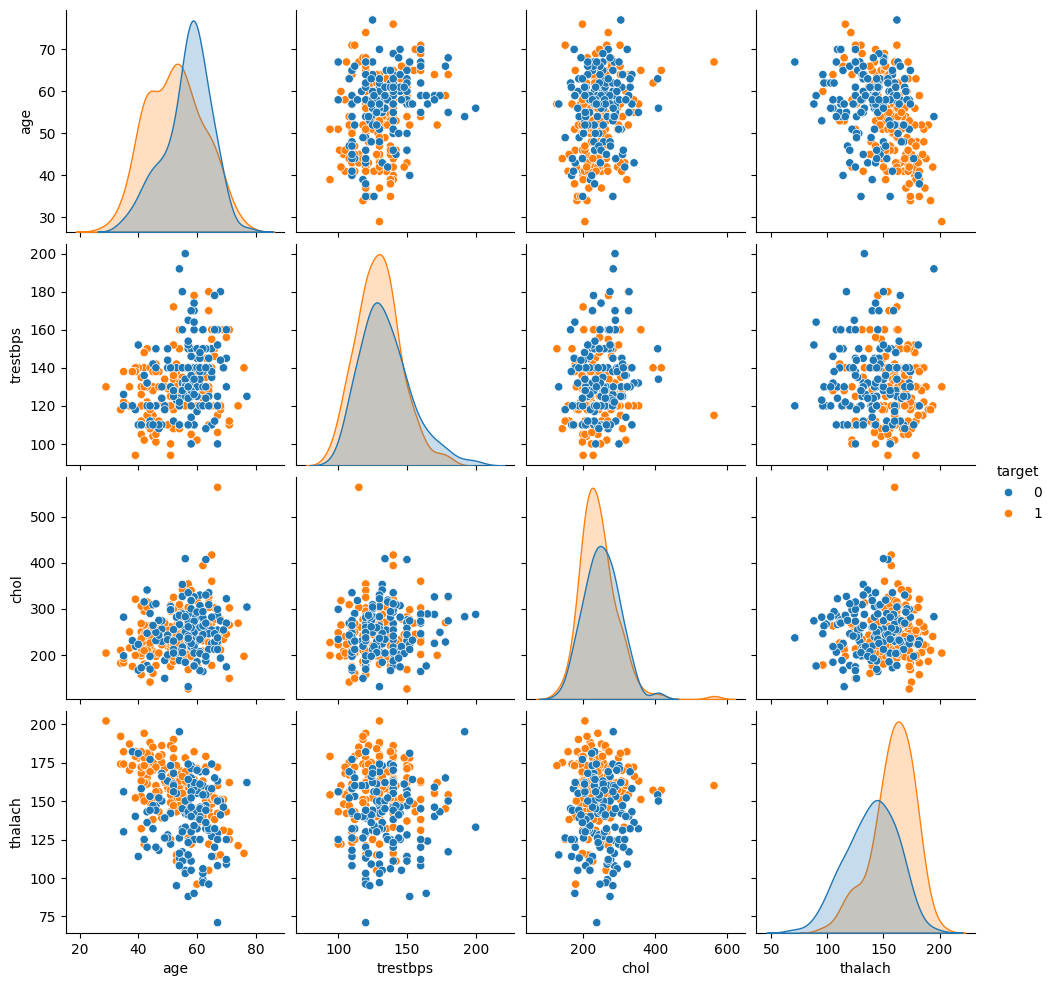

In [15]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

#### Create a heatmap that displays the correlation between all the columns

<Axes: >

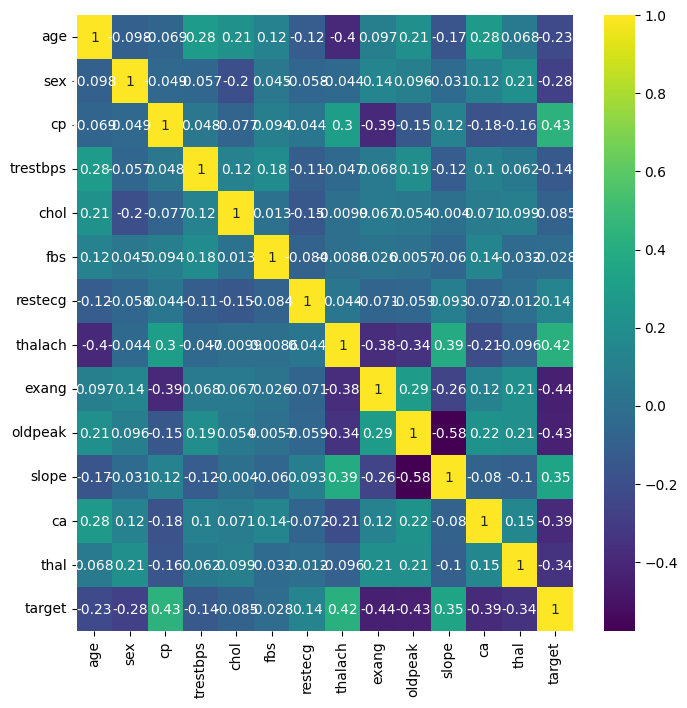

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

----
----

# Machine Learning

## Train | Test Split and Scaling


In [22]:
X = df.drop('target', axis=1)

In [23]:
y = df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)

In [29]:
X_test = sc.transform(X_test)

## Logistic Regression Model

**We will create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. There are two options here, using *LogisticRegressionCV* OR combining *LogisticRegression* and *GridSearchCV*.**

In [30]:
from sklearn.linear_model import LogisticRegressionCV

In [35]:
model = LogisticRegressionCV()

In [36]:
model.fit(X_train, y_train)

LogisticRegressionCV()

**The optimal parameters, specifically the C value.** 

In [38]:
model.C_

array([0.04641589])

### Coeffecients

In [68]:
model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [71]:
coefs = pd.Series(index=X.columns, data=model.coef_[0])

In [72]:
coefs = coefs.sort_values()

In [76]:
coefs.values

array([-0.49735752, -0.39460154, -0.37448551, -0.352386  , -0.33438151,
       -0.13850191, -0.09621199, -0.08830462,  0.02487341,  0.08083826,
        0.25101033,  0.29914053,  0.53534731])

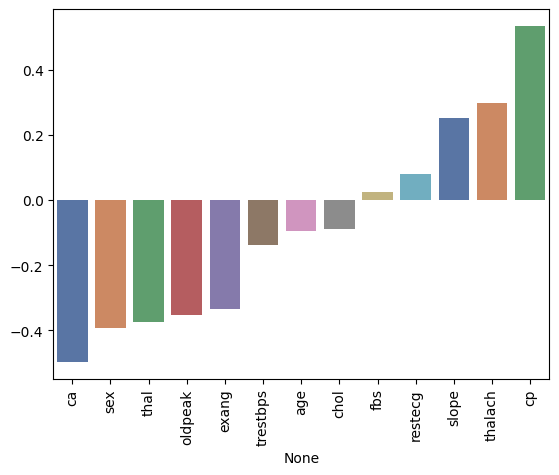

In [81]:
sns.barplot(x=coefs.index, y=coefs.values, hue=coefs.index, palette='deep')
plt.xticks(rotation=90);

---------

## Model Performance Evaluation

**The evaluation of the model on the remaining 10% of the data, the test set.**

**Evaluations:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [82]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
#from sklearn.metrics import plot_confusion_matrix

In [87]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

<Axes: >

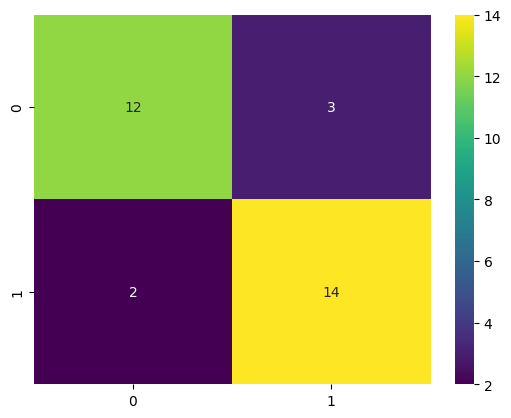

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**Create both the precision-recall curve and the ROC Curve.**

---
---

**A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?

In [93]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [94]:
model.predict(patient)

array([0])

In [95]:
model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])